In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime

import MetaTrader5 as mt5
import pytz

from IPython.display import display, display_markdown

### MT5を利用してEURJPYのティックデータを取得する(2020/10/01~2021/03/31)

In [2]:
# connect to MetaTrader 5
if not mt5.initialize():
    print("initialize() failed")
    mt5.shutdown()

# set time zone to UTC
timezone = pytz.utc

# create 'datetime' objects in UTC time zone to avoid the implementation of a local time zone offset
utc_from = datetime(2020, 10, 1, tzinfo=timezone) 
utc_to = datetime(2021, 4, 1, 0, 0, tzinfo=timezone)

ticks = mt5.copy_ticks_range("USDJPY", utc_from, utc_to, mt5.COPY_TICKS_ALL)
ticks_frame = pd.DataFrame(ticks)

# convert time in seconds into the datetime format
ticks_frame['time']=pd.to_datetime(ticks_frame['time'], unit='s')

# shut down connection to the MetaTrader 5 terminal
mt5.shutdown()

# display data
ticks_frame.head(10)

,time,bid,ask,last,volume,time_msc,flags,volume_real
0,2020-10-01 00:00:04,105.519,105.568,0.0,0,1601510404830,134,0.0
1,2020-10-01 00:00:06,105.474,105.505,0.0,0,1601510406304,134,0.0
2,2020-10-01 00:00:06,105.474,105.503,0.0,0,1601510406809,4,0.0
3,2020-10-01 00:00:07,105.474,105.502,0.0,0,1601510407465,4,0.0
4,2020-10-01 00:00:08,105.474,105.500,0.0,0,1601510408129,4,0.0
5,2020-10-01 00:00:09,105.474,105.491,0.0,0,1601510409257,4,0.0
6,2020-10-01 00:00:18,105.474,105.492,0.0,0,1601510418196,4,0.0
7,2020-10-01 00:00:18,105.468,105.493,0.0,0,1601510418246,134,0.0
8,2020-10-01 00:00:21,105.472,105.493,0.0,0,1601510421879,130,0.0
9,2020-10-01 00:00:21,105.456,105.493,0.0,0,1601510421981,130,0.0


### データについて調査

Text(0, 0.5, 'price')

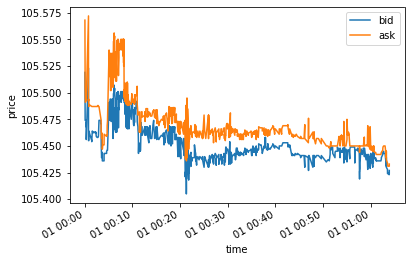

In [3]:
ticks_frame.set_index('time', inplace=True)
ticks_frame[['bid', 'ask']][:1000].plot()
plt.xlabel('time')
plt.ylabel('price')

BID/ASKでそれぞれのティックデータが存在する。  
一般的なチャートでは、BIDを表示しているようなので以降はBIDを利用する。

In [4]:
def convert_flags(flags):
    fl = ''
    
    if (flags & mt5.TICK_FLAG_BID) == mt5.TICK_FLAG_BID:
        fl += "b"
    if (flags & mt5.TICK_FLAG_ASK) == mt5.TICK_FLAG_ASK:
        fl += "s"
    if (flags & mt5.TICK_FLAG_LAST) == mt5.TICK_FLAG_LAST:
        fl += "l"
    if (flags & mt5.TICK_FLAG_VOLUME) == mt5.TICK_FLAG_VOLUME:
        fl += "v"
    if (flags & mt5.TICK_FLAG_BUY) == mt5.TICK_FLAG_BUY:
        fl += "Ob";
    if (flags & mt5.TICK_FLAG_SELL) == mt5.TICK_FLAG_SELL:
        fl += "Os";

    return fl

In [5]:
ticks_frame['flags_converted'] = ticks_frame['flags'].apply(convert_flags)
ticks_frame.head()

,bid,ask,last,volume,time_msc,flags,volume_real,flags_converted
time,,,,,,,,
2020-10-01 00:00:04,105.519,105.568,0.0,0,1601510404830,134,0.0,bs
2020-10-01 00:00:06,105.474,105.505,0.0,0,1601510406304,134,0.0,bs
2020-10-01 00:00:06,105.474,105.503,0.0,0,1601510406809,4,0.0,s
2020-10-01 00:00:07,105.474,105.502,0.0,0,1601510407465,4,0.0,s
2020-10-01 00:00:08,105.474,105.500,0.0,0,1601510408129,4,0.0,s


In [6]:
print('before size: ', len(ticks_frame))
tick_frame_b = ticks_frame[ticks_frame['flags_converted'].str.contains('b')].copy()
print('agter size: ', len(tick_frame_b))
tick_frame_b.head()

before size:  10159381
agter size:  6894634


,bid,ask,last,volume,time_msc,flags,volume_real,flags_converted
time,,,,,,,,
2020-10-01 00:00:04,105.519,105.568,0.0,0,1601510404830,134,0.0,bs
2020-10-01 00:00:06,105.474,105.505,0.0,0,1601510406304,134,0.0,bs
2020-10-01 00:00:18,105.468,105.493,0.0,0,1601510418246,134,0.0,bs
2020-10-01 00:00:21,105.472,105.493,0.0,0,1601510421879,130,0.0,b
2020-10-01 00:00:21,105.456,105.493,0.0,0,1601510421981,130,0.0,b


In [7]:
1 - 6894634 / 10159381

0.32135294463314246

In [8]:
tick_frame_b.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6894634 entries, 2020-10-01 00:00:04 to 2021-03-31 23:59:53
Data columns (total 8 columns):
 #   Column           Dtype  
---  ------           -----  
 0   bid              float64
 1   ask              float64
 2   last             float64
 3   volume           uint64 
 4   time_msc         int64  
 5   flags            uint32 
 6   volume_real      float64
 7   flags_converted  object 
dtypes: float64(4), int64(1), object(1), uint32(1), uint64(1)
memory usage: 447.1+ MB


In [9]:
tick_frame_b.isnull().any()

bid                False
ask                False
last               False
volume             False
time_msc           False
flags              False
volume_real        False
flags_converted    False
dtype: bool

### 標準バー方式

In [10]:
price_daily = tick_frame_b['bid'].resample('D').ohlc()
price_daily.dropna(inplace=True)
price_daily.head()

,open,high,low,close
time,,,,
2020-10-01,105.519,105.727,105.403,105.519
2020-10-02,105.519,105.665,104.941,105.328
2020-10-05,105.263,105.792,105.263,105.745
2020-10-06,105.750,105.786,105.470,105.627
2020-10-07,105.625,106.106,105.595,105.975


### 情報ドリブン方式

In [12]:
df_driven = tick_frame_b[['bid']].copy()
df_driven['delta_p'] = df_driven['bid'].diff()
df_driven.dropna(inplace=True)
df_driven.head()

,bid,delta_p
time,,
2020-10-01 00:00:06,105.474,-0.045
2020-10-01 00:00:18,105.468,-0.006
2020-10-01 00:00:21,105.472,0.004
2020-10-01 00:00:21,105.456,-0.016
2020-10-01 00:00:49,105.523,0.067


In [13]:
# delta_p=0があるかを確認しておく
(df_driven.delta_p == 0).sum()

125229

In [14]:
# 価格が変化ないものは一旦、np.nanを入れておく ⇒ fillna(ffill)で補完する
df_driven['b'] = df_driven['delta_p'].apply(lambda x: np.nan if x == 0 else 1 if x > 0 else -1)
df_driven.fillna(method='ffill', inplace=True)
df_driven

,bid,delta_p,b
time,,,
2020-10-01 00:00:06,105.474,-0.045,-1.0
2020-10-01 00:00:18,105.468,-0.006,-1.0
2020-10-01 00:00:21,105.472,0.004,1.0
2020-10-01 00:00:21,105.456,-0.016,-1.0
2020-10-01 00:00:49,105.523,0.067,1.0
...,...,...,...
2021-03-31 23:59:30,110.716,0.001,1.0
2021-03-31 23:59:30,110.715,-0.001,-1.0
2021-03-31 23:59:30,110.714,-0.001,-1.0


<AxesSubplot:xlabel='time'>

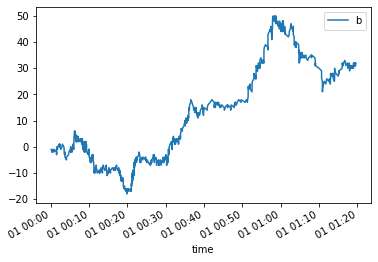

In [15]:
# bの推移(累積)を見てみる
df_driven[['b']].cumsum().iloc[:1000, :].plot()

In [16]:
# 扱いやすいようにインデックス番号を振っておく
df_driven.reset_index(inplace=True)
df_driven.head()

,time,bid,delta_p,b
0,2020-10-01 00:00:06,105.474,-0.045,-1.0
1,2020-10-01 00:00:18,105.468,-0.006,-1.0
2,2020-10-01 00:00:21,105.472,0.004,1.0
3,2020-10-01 00:00:21,105.456,-0.016,-1.0
4,2020-10-01 00:00:49,105.523,0.067,1.0


## Samplerの作成
https://gist.github.com/maks-ivanov/24022b2be6c83220b47143bab88619c7  
https://towardsdatascience.com/financial-machine-learning-part-0-bars-745897d4e4ba  

In [17]:
from tqdm import tqdm


class TickInbalanceBar():
    '''
    情報ドリブン方式：ティックインバランスバーを抽出するクラス
    '''
    def __init__(self, b_vals, T):
        '''
        b_vals: ティック符号配列
        T: ティックバーのサイズの期待値(初期値)
        '''
        self.b_vals = b_vals
        self.n = len(b_vals)
        self.theta_T = 0
        self._init_T = T
        self._t_prev = 0 # バーの開始時点
        
        # 初期パラメータを設定
        self.E_T = T # Eの期待値
        self.P = abs(np.mean(b_vals)) # とりあえず、全体平均
        self.E_theta_T = self.E_T * self.P 
        
        # 格納用
        self._samples_t = [] # サンプリングされた時点t
        self._Ts = [] # ティックバーのサイズ
        self._theta_Ts = [] # theta_T
        self._E_theta_Ts = [] # E_theta_T
     
    def sampler(self):
        '''
        ティックインバランスバーを抽出する(バッチ処理)
        '''
        # 各時点で閾値を超えるか判定
        for t in tqdm(range(self.n)):
            self.theta_T += self.b_vals[t]
            
            self._theta_Ts.append(self.theta_T)
            self._E_theta_Ts.append(self.E_theta_T)
            
            if abs(self.theta_T) >= self.E_theta_T:
                # サンプル対象として保存
                self._samples_t.append(t)
                self._Ts.append(t - self._t_prev)
                
                # パラメータの更新
                self.E_T = self._ewma(np.array(self._Ts), window=len(self._Ts))[-1] # 前のバーまでのTの指数移動平均
                self.P = self._ewma(self.b_vals[:t], window=self._init_T * 3)[-1] # b_valの指数移動平均
                self.E_theta_T = self.E_T * abs(self.P)
                #print(abs(self.theta_T), self.E_theta_T)
                
                # 値のリセット
                self.theta_T = 0
                self._t_prev = t
                
    def _ewma(self, arr_in, window):

        n = arr_in.shape[0]
        ewma = np.empty(n, dtype=np.float64)
        alpha = 2 / float(window + 1)
        w = 1
        ewma_old = arr_in[0]
        ewma[0] = ewma_old
        for i in range(1, n):
            w += (1-alpha)**i
            ewma_old = ewma_old*(1-alpha) + arr_in[i]
            ewma[i] = ewma_old / w
        return ewma

In [38]:
E_T = 10000# E[T]:ティックバーのサイズの期待値(初期値)

#tb = TickInbalanceBar(df_driven['b'].values, E_T, alpha)
tb = TickInbalanceBar(df_driven['b'].values, E_T)

In [39]:
tb.sampler()

100%|█████████████████████████████████████████████████████████████████████| 6894633/6894633 [01:36<00:00, 71761.76it/s]


In [43]:
len(tb._samples_t)

39

In [44]:
len(price_daily)

128

In [48]:
df_driven.loc[tb._samples_t, :]

,time,bid,delta_p,b
22876,2020-10-01 14:28:23,105.487,-0.001,-1.0
50815,2020-10-02 00:56:06,105.543,0.000,1.0
64485,2020-10-02 08:33:44,105.213,-0.011,-1.0
109974,2020-10-05 02:11:43,105.503,-0.001,-1.0
161658,2020-10-06 10:41:32,105.643,-0.002,-1.0
239887,2020-10-08 04:44:50,106.000,-0.001,-1.0
284446,2020-10-09 10:18:22,105.932,-0.001,-1.0
410180,2020-10-14 14:48:55,105.349,-0.001,-1.0
524948,2020-10-19 13:14:18,105.308,-0.001,-1.0
601395,2020-10-21 09:43:25,105.206,-0.002,-1.0


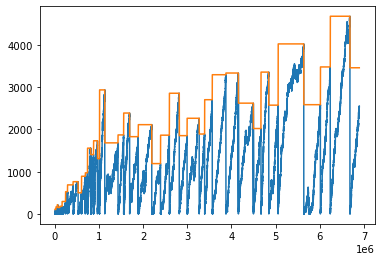

In [53]:
plt.figure()
plt.plot(np.abs(tb._theta_Ts))
plt.plot(tb._E_theta_Ts)

In [56]:
df_bar = df_driven.loc[tb._samples_t, :]
df_bar.reset_index(drop=True, inplace=True)
df_bar.head()

,time,bid,delta_p,b
0,2020-10-01 14:28:23,105.487,-0.001,-1.0
1,2020-10-02 00:56:06,105.543,0.000,1.0
2,2020-10-02 08:33:44,105.213,-0.011,-1.0
3,2020-10-05 02:11:43,105.503,-0.001,-1.0
4,2020-10-06 10:41:32,105.643,-0.002,-1.0


Text(0.5, 1.0, 'Tick Inbalance Bar')

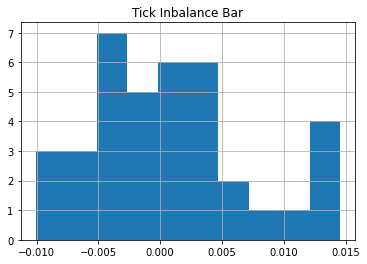

In [71]:
df_bar['R'] = df_bar['bid'].diff() / df_bar['bid']
df_bar['R'].hist(bins=10)
plt.title('Tick Inbalance Bar')

Text(0.5, 1.0, 'Daily Return')

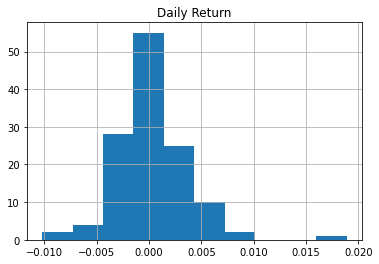

In [72]:
price_daily['R'] = price_daily['close'].diff() / price_daily['close']
price_daily['R'].hist()
plt.title('Daily Return')

In [74]:
tb._samples_t

[22876,
 50815,
 64485,
 109974,
 161658,
 239887,
 284446,
 410180,
 524948,
 601395,
 688016,
 737356,
 811168,
 874500,
 963465,
 1009794,
 1128922,
 1428121,
 1555872,
 1691682,
 1887178,
 2193603,
 2391710,
 2591536,
 2816591,
 2993111,
 3268137,
 3390454,
 3563256,
 3871954,
 4154984,
 4494306,
 4666621,
 4842908,
 5055904,
 5635965,
 6013339,
 6236921,
 6682861]

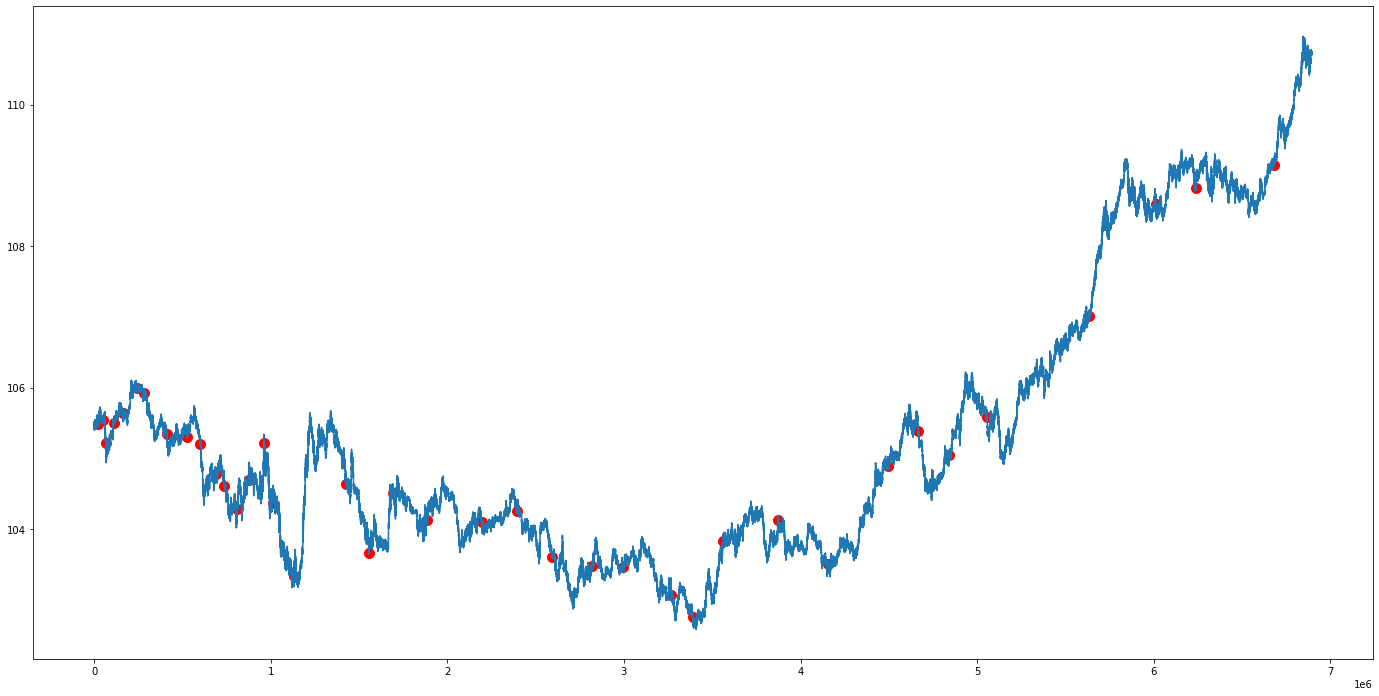

In [117]:
plt.figure(figsize=(24, 12))
df_driven['bid'].plot()
plt.scatter(x=tb._samples_t, y=df_bar['bid'], color='red', s=100)